[View in Colaboratory](https://colab.research.google.com/github/raam93/DrivenData-Pump-It-Up/blob/master/pump_it_up.ipynb)

In [0]:
# import libraries
%matplotlib inline

import sys

import scipy
import numpy as np
import math

import pandas as pd
import sklearn

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#import warnings
#warnings.filterwarnings('ignore')

# Reading Data

In [2]:
!git clone https://github.com/raam93/DrivenData-Pump-It-Up.git

Cloning into 'DrivenData-Pump-It-Up'...
remote: Counting objects: 12, done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [3]:
!ls DrivenData-Pump-It-Up/

README.md  testX.csv  trainX.csv  trainY.csv


In [4]:
trainX = pd.read_csv('DrivenData-Pump-It-Up/trainX.csv')
trainX.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [5]:
# just getting to know about the variables
desc = trainX.describe(include='all')
desc

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400.000000,59400.000000,59400,55765,59400.000000,55745,59400.000000,5.940000e+04,59400,59400.000000,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,NaN,NaN,356,1897,NaN,2145,NaN,NaN,37400,NaN,...,7,8,6,5,5,10,7,3,7,6
top,NaN,NaN,2011-03-15,Government Of Tanzania,NaN,DWE,NaN,NaN,none,NaN,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,NaN,NaN,572,9084,NaN,17402,NaN,NaN,3563,NaN,...,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625
mean,37115.131768,317.650385,NaN,NaN,668.297239,NaN,34.077427,-5.706033e+00,NaN,0.474141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,21453.128371,2997.574558,NaN,NaN,693.116350,NaN,6.567432,2.946019e+00,NaN,12.236230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,-90.000000,NaN,0.000000,-1.164944e+01,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,18519.750000,0.000000,NaN,NaN,0.000000,NaN,33.090347,-8.540621e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37061.500000,0.000000,NaN,NaN,369.000000,NaN,34.908743,-5.021597e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,55656.500000,20.000000,NaN,NaN,1319.250000,NaN,37.178387,-3.326156e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
trainY = pd.read_csv('DrivenData-Pump-It-Up/trainY.csv')
trainY.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [0]:
testX = pd.read_csv('DrivenData-Pump-It-Up/testX.csv')

# Feature Engineering

Based on the description of the variables, I'm grouping them according to a certain common quality for easier reference.

In [0]:
waterpoint_characs = ['amount_tsh', 'gps_height', 'extraction_type', 'extraction_type_group',
                     'extraction_type_class', 'waterpoint_type', 'waterpoint_type_group'] 

waterpoint_locs = ['longitude', 'latitude', 'basin', 'subvillage', 'region', 'region_code',
                  'district_code', 'lga', 'ward']

water_characs = ['water_quality', 'quality_group', 'quantity', 'quantity_group', 'source',
                'source_type', 'source_class']

In [0]:
management = ['funder', 'installer', 'recorded_by', 'scheme_management',
              'management', 'management_group']

In [0]:
misc = ['date_recorded', 'num_private', 'population', 'public_meeting', 'permit',
       'construction_year', 'payment', 'payment_type']

In [0]:
not_required = ['wpt_name', 'scheme_name']

In [12]:
# total no. of features. First column is the ID.
len(waterpoint_characs + water_characs + waterpoint_locs + misc + management + not_required)

39

## Waterpoint Characteristics

Plotting each group of features and understanding how they are distributed. The Plot functions are displayed at the end.

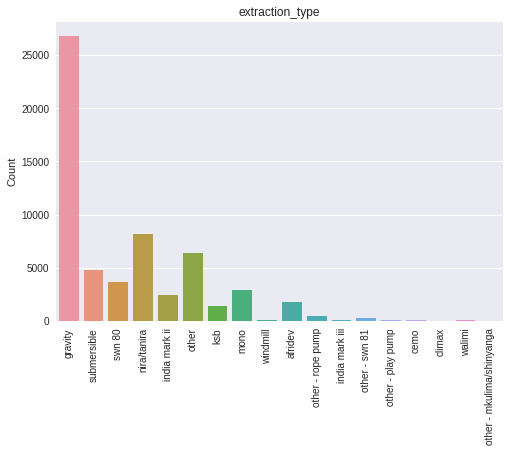

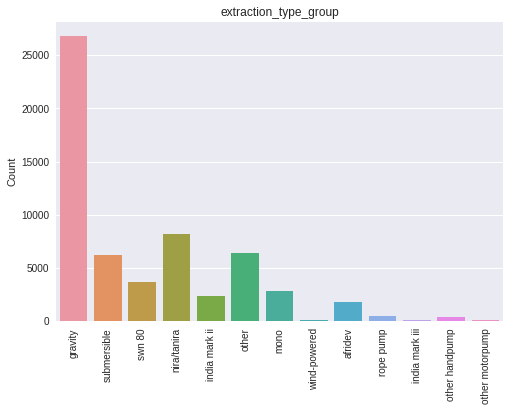

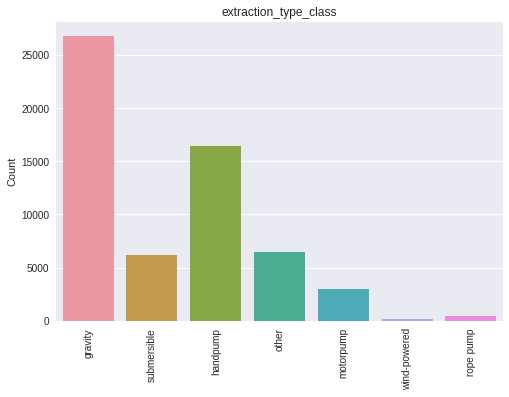

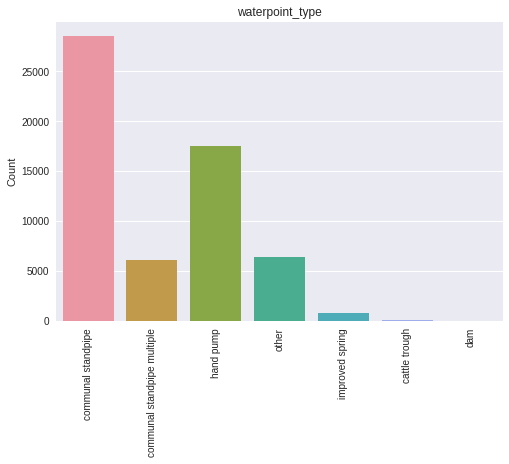

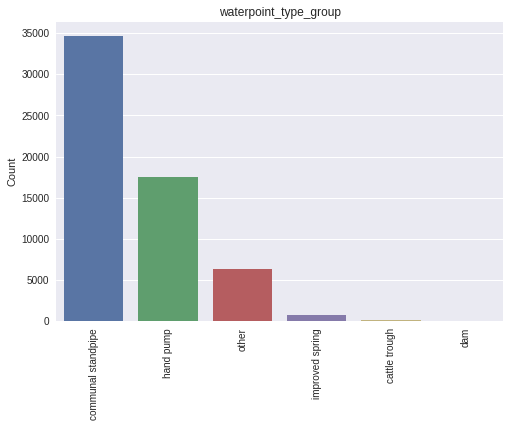

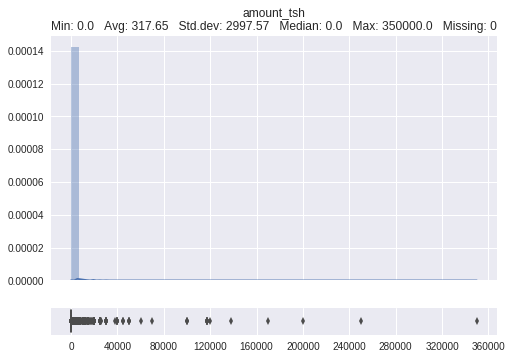

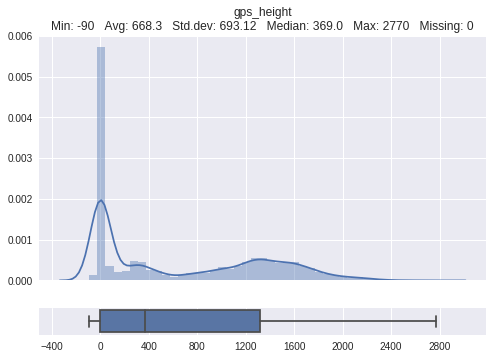

In [0]:
plot_features_of(trainX, waterpoint_characs)

So, looking at the plots above, many variables seem redundant. 
First, **'extraction_type'** and **'extraction_type_group'**  contain almost same info. The first variable seems too detailed and hence I'm using the later. But **'extraction_type class'** could be used because it seems to convey something slightly different from the above two variables.

However, **'waterpoint_type'** is kept while **'waterpoint_type_group'** is removed, because they both seem to carry redundant information and the first variable is only slightly detailed than the second.

In [0]:
waterpoint_characs.remove('extraction_type')
waterpoint_characs.remove('waterpoint_type_group')

Just seeing if same pattern is followed in the test set. It seems to follow.

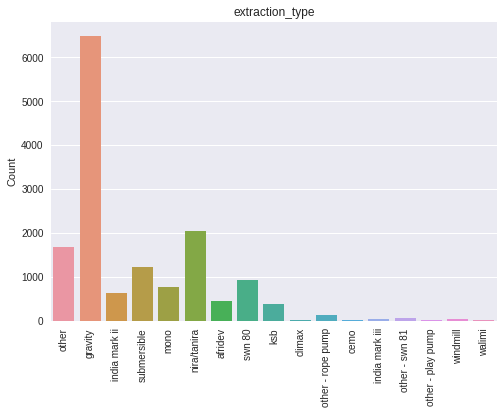

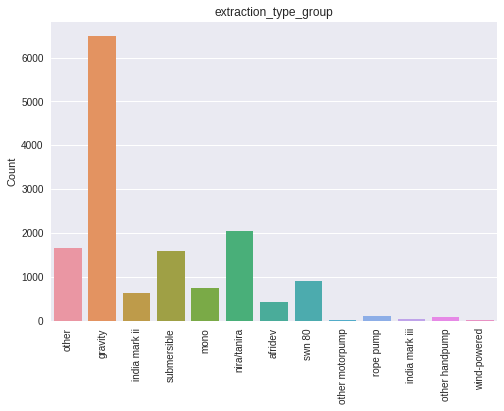

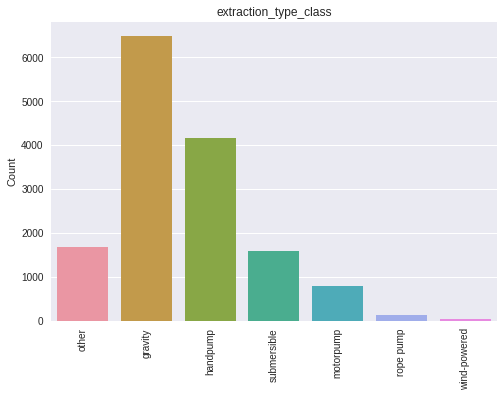

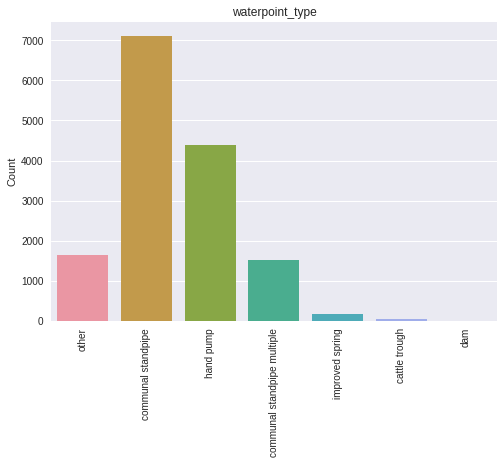

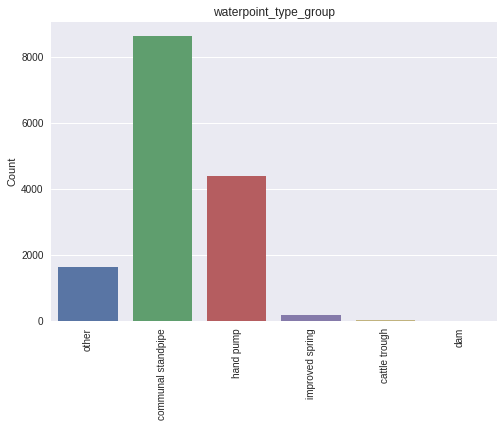

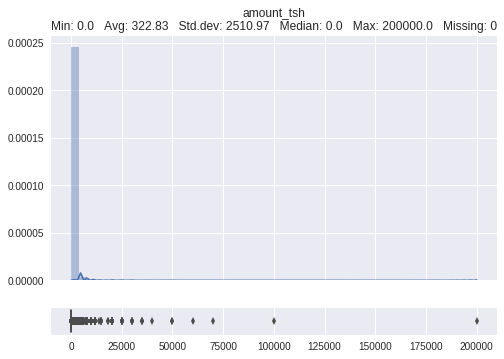

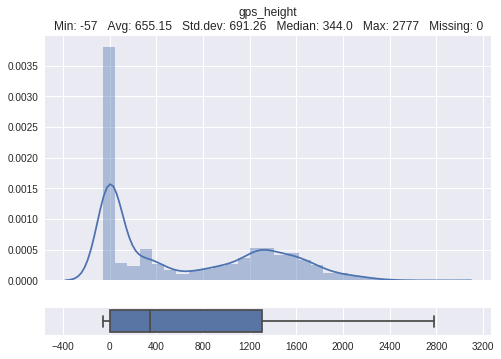

In [0]:
plot_features_of(testX, waterpoint_characs)

Then, **'amount_tsh'** variable seems to have the same value for most records. It is also converted into object type and a categorical plot is plotted to get a feel of the frequency of its different values. Clearly, most of the values are near zero, which could also mean they might be missing or corrupted. Several options now:
(1) ignore this variables or (2) can replace with that particular region/location's average etc. I'm chosing here to ignore this variable as of now.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


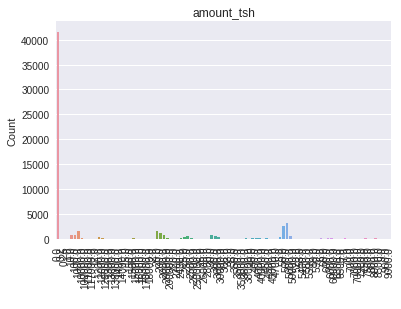

In [0]:
tsh = trainX[['amount_tsh']].astype(str)
tsh.dtypes
discrete_plot(tsh, ['amount_tsh'])

In [0]:
waterpoint_characs.remove('amount_tsh')


Next, **'gps_height'** has more values near zero or some negatives. Tanzania does not have more land near the sea level (https://www.researchgate.net/figure/Map-of-Tanzania-showing-the-elevation-metres-above-sea-level-Eastern-and-Western-Great_fig1_260447583), and hence it is not possible to have this many wells whose altitudes are less than or near zero. Hence these values are treated like missing or corrupted. So they could be replaced with that particular region/location's average/median. Looking at the **waterpoint_locs** variable group, I feel that replacing based on **basin** instead of location or region would be more appropriate.


In [16]:
# grouping gps_height accoridng to basin
basinX = trainX[['basin', 'gps_height']]

# gps_height grouped by basin
basinX.groupby('basin').agg({np.mean, np.min, np.max}).reset_index()

basin   gps_height           
                                   mean amin  amax
0                 Internal   885.677328    0  2770
1               Lake Nyasa   796.058407    0  2568
2               Lake Rukwa   583.585575    0  2222
3          Lake Tanganyika   715.002954    0  1985
4            Lake Victoria   328.424961    0  2056
5                  Pangani  1034.890045  -39  2151
6                   Rufiji   880.665873  -57  2233
7  Ruvuma / Southern Coast   410.640329  -90  1641
8              Wami / Ruvu   206.458827  -63  1665

In [17]:
# looking at only those gps_height whose values are greater than zero.
basinX[basinX>0].groupby('basin').agg({np.mean, np.min, np.max}).reset_index()

basin   gps_height                
                                   mean    amin    amax
0                 Internal  1474.550470   612.0  2770.0
1               Lake Nyasa  1524.654237   436.0  2568.0
2               Lake Rukwa  1415.137352   795.0  2222.0
3          Lake Tanganyika  1270.063242   743.0  1985.0
4            Lake Victoria  1329.265008  1127.0  2056.0
5                  Pangani  1102.257742     1.0  2151.0
6                   Rufiji  1087.780631     1.0  2233.0
7  Ruvuma / Southern Coast   455.058376     1.0  1641.0
8              Wami / Ruvu   308.914208     1.0  1665.0

From the above tables, the minimum **gps_height** of first five basins (after removing zero) shows that the they are clearly much greater than zero. So, here zeros must be missing/corrupt for these basins. However, I'm not completely sure if negative values can be allowed for last four basins. So, I'm assuming that the whole data collection process would mostly have been homogenous for every basin, and hence only zeros and not negative values are treated as missing (similar to how it is for first five basins).

In [0]:
# creating a copy of oringinal train data to not disturb the original data
trainX1 = trainX.copy()

In [0]:
# replacing zero values of gps_height with the respective basin's mean
trainX1['gps_height'].replace(0, np.NaN, inplace = True)

trainX1['gps_height'] = trainX1['gps_height'].fillna(trainX1.groupby('basin')['gps_height'].transform('mean'))
trainX1.gps_height = trainX1.gps_height.astype(int)

In [22]:
trainX1.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,1329,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [0]:
# doing same for test set
testX1 = testX.copy()
testX1['gps_height'].replace(0, np.NaN, inplace = True)

testX1['gps_height'] = testX1['gps_height'].fillna(trainX1.groupby('basin')['gps_height'].transform('mean'))

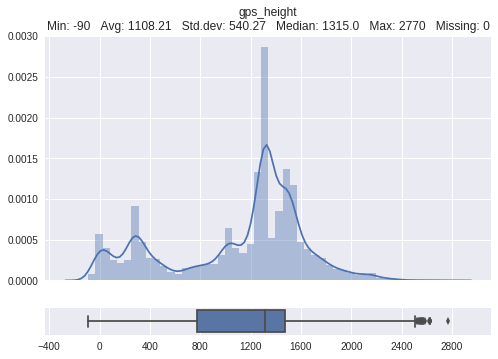

In [0]:
# Now, plotting modified gps_height variable - zeros replaced with mean
numeric_plot(trainX1, ['gps_height'])

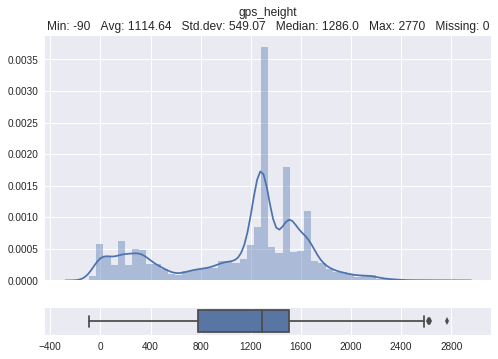

In [0]:
# I also ran the above code with median of each basin instead of mean. the results were not so different. So kept mean itself.
numeric_plot(trainX1, ['gps_height'])

In [24]:
# group by basin after replacement 
trainX1.groupby('basin')['gps_height'].agg({np.mean, np.min, np.max}).reset_index()

,basin,mean,amin,amax
0,Internal,1474.330636,612,2770
1,Lake Nyasa,1524.341593,436,2568
2,Lake Rukwa,1415.056642,795,2222
3,Lake Tanganyika,1270.035603,743,1985
4,Lake Victoria,1329.065476,1127,2056
5,Pangani,1081.685011,-39,2151
6,Rufiji,1029.674774,-57,2233
7,Ruvuma / Southern Coast,411.189183,-90,1641
8,Wami / Ruvu,268.322198,-63,1665


## Waterpoint locations

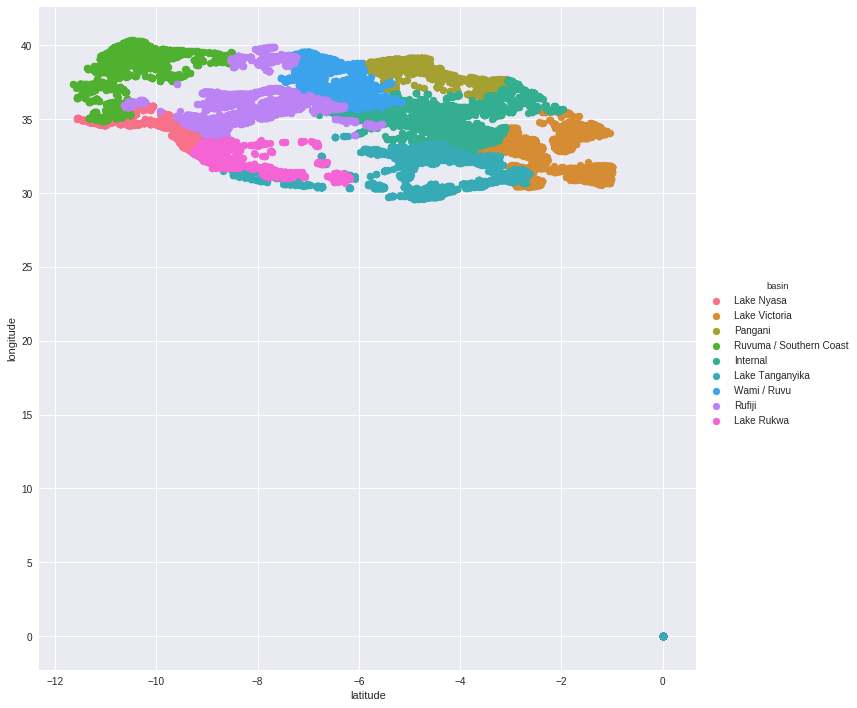

In [0]:
# Plotting latitude and longitude, grouped by basin
sns.FacetGrid(trainX, hue="basin", size=10) \
   .map(plt.scatter, "latitude", "longitude") \
   .add_legend()

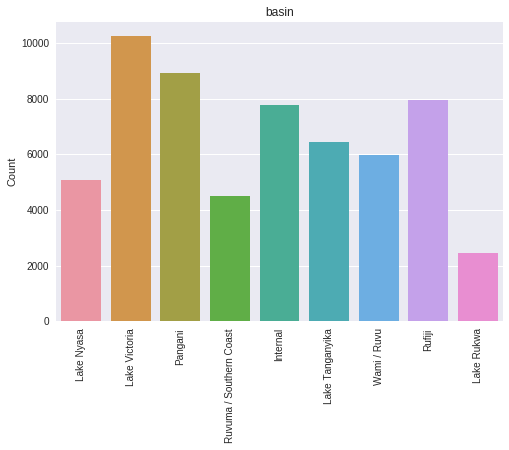

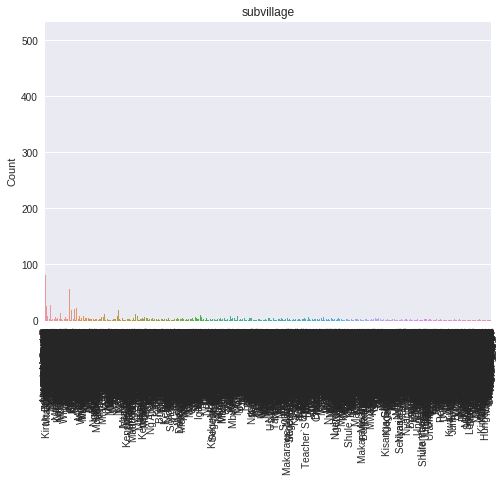

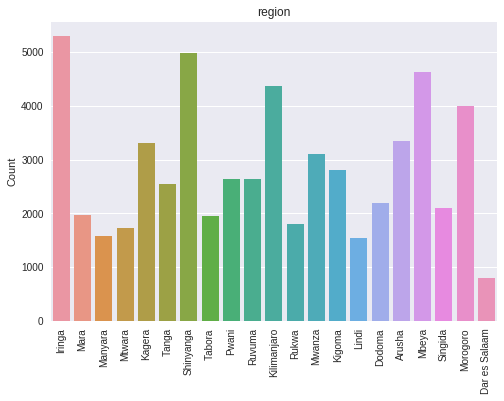

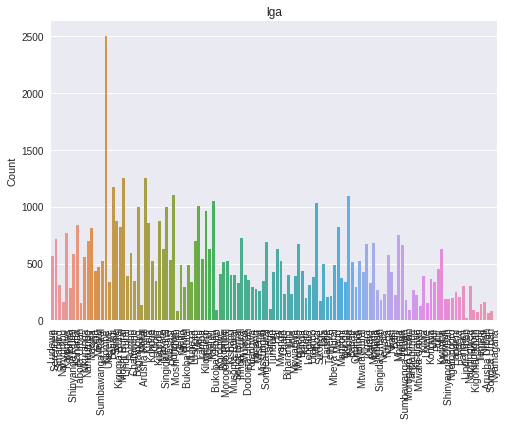

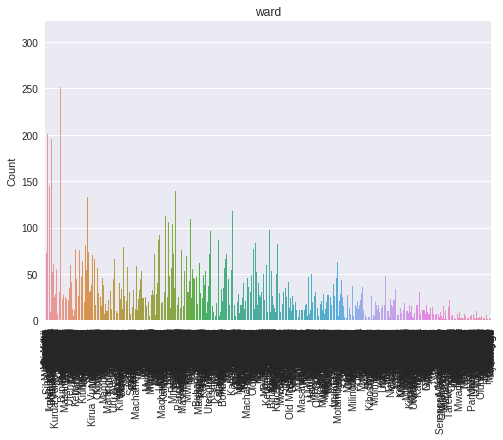

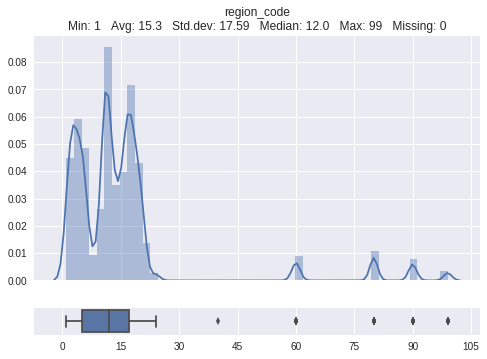

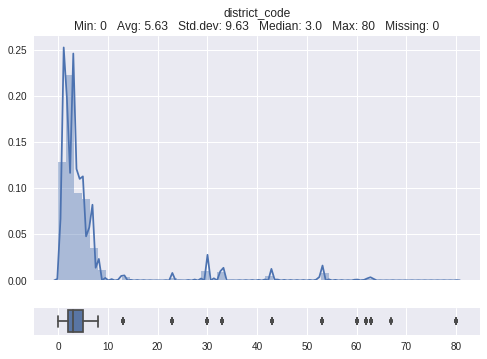

In [0]:
# Plotting other variables of the group waterpoint_locs

waterpoint_locs = ['basin', 'subvillage', 'region', 'region_code',
                  'district_code', 'lga', 'ward']
plot_features_of(trainX, waterpoint_locs)

Clearly, from the above plot, variables **subvillage**, **lga** and **ward** have too many unique values. Hence, they are removed. 
Further, instead of **region_code**, **region**, which also seems to convey the same information, is used. Again, **district_code** seems redundant in this context.

In [0]:
waterpoint_locs = ['latitude', 'longitude', 'basin', 'region'] 

In [0]:
# Replacing '0' lattitude & longitude based on the characteristic of its basin - no change for mean or median
trainX1['latitude'].replace(0, np.NaN, inplace = True)

trainX1['latitude'] = trainX1['latitude'].fillna(trainX1.groupby('basin')['latitude'].transform('mean'))

trainX1['longitude'].replace(0, np.NaN, inplace = True)

trainX1['longitude'] = trainX1['longitude'].fillna(trainX1.groupby('basin')['longitude'].transform('mean'))


In [0]:
# doing same for test set
testX1['latitude'].replace(0, np.NaN, inplace = True)

testX1['latitude'] = testX1['latitude'].fillna(trainX1.groupby('basin')['latitude'].transform('mean'))

testX1['longitude'].replace(0, np.NaN, inplace = True)

testX1['longitude'] = testX1['longitude'].fillna(trainX1.groupby('basin')['longitude'].transform('mean'))


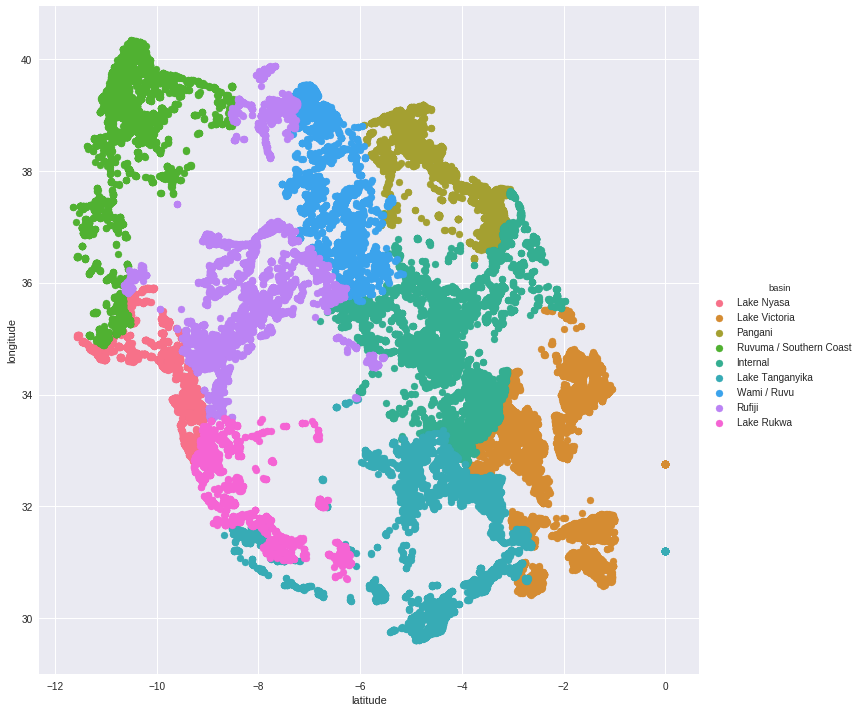

In [29]:
# Plotting replaced lattitude & longitude
sns.FacetGrid(trainX1, hue="basin", size=10) \
   .map(plt.scatter, "latitude", "longitude") \
   .add_legend()

## Water characteristics

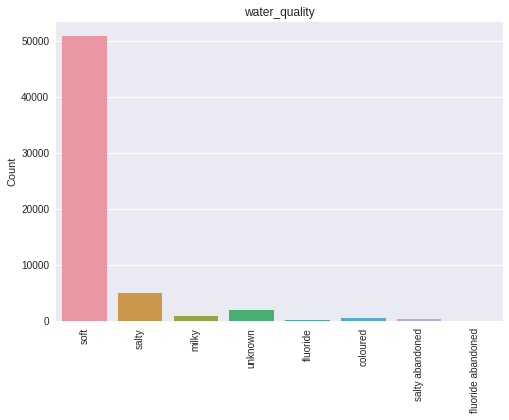

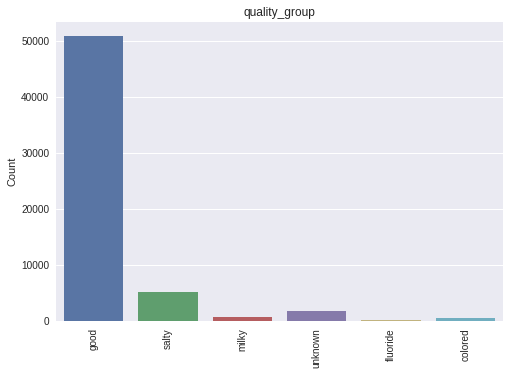

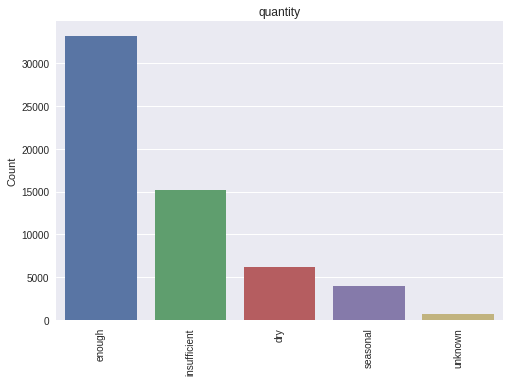

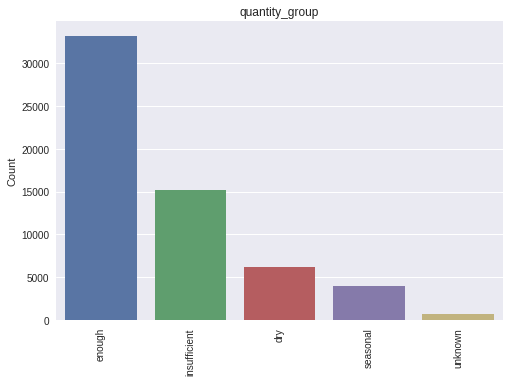

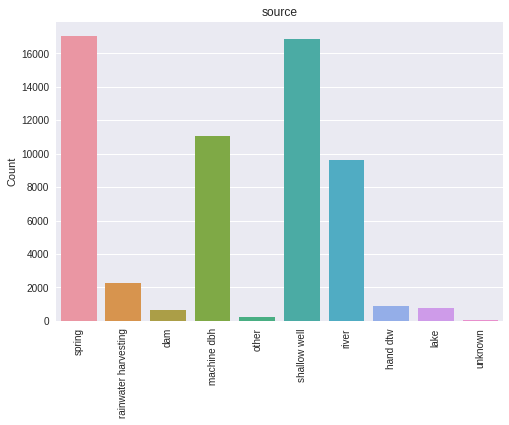

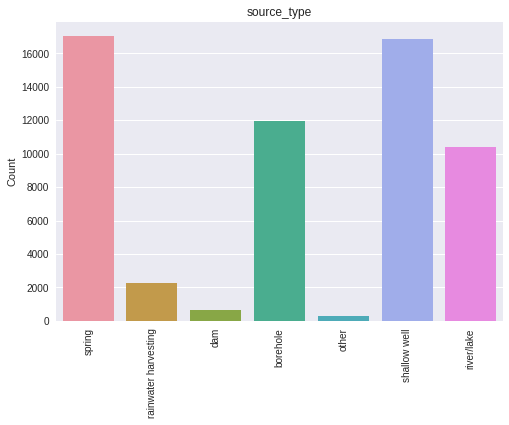

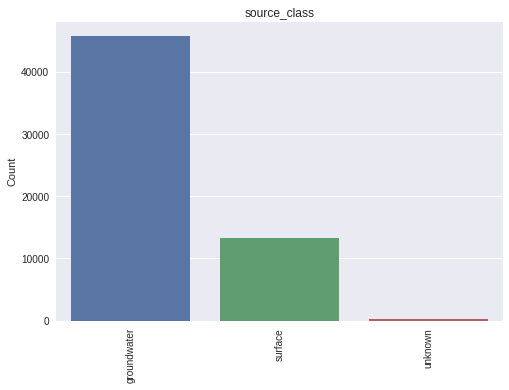

In [0]:
plot_features_of(trainX, water_characs)

**'water_quality_group'** could be grouped as good or bad. However, I'm them unchanged as of now. It is highly correlated with **water_quality** and hence the later is not used. Similarly, **quantity_group** is used.

Then, **'source_type'** is used instead of **source**. **'source_class'** seems to convey different meaning and hence is used.

In [0]:
#trainX1['quality_group'].replace({'salty':'bad', 'milky':'bad', 'unknown':'bad', 
#                                  'fluoride':'bad','colored':'bad'}, inplace=True)


In [0]:
# doing same for test set
#testX1['quality_group'].replace({'salty':'bad', 'milky':'bad', 'unknown':'bad', 
#                                  'fluoride':'bad','colored':'bad'}, inplace=True)


In [0]:
water_characs = ['quality_group', 'quantity_group', 'source_type', 'source_class']

## Management

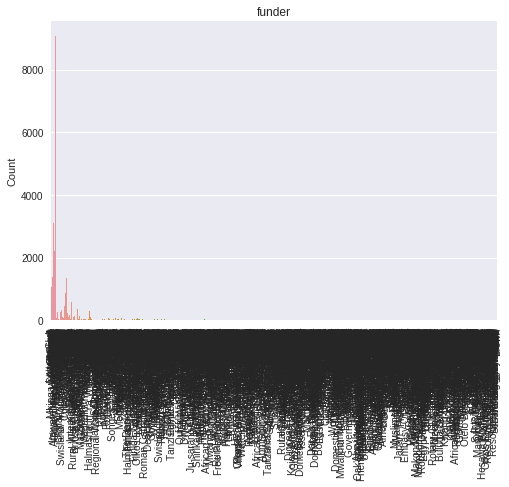

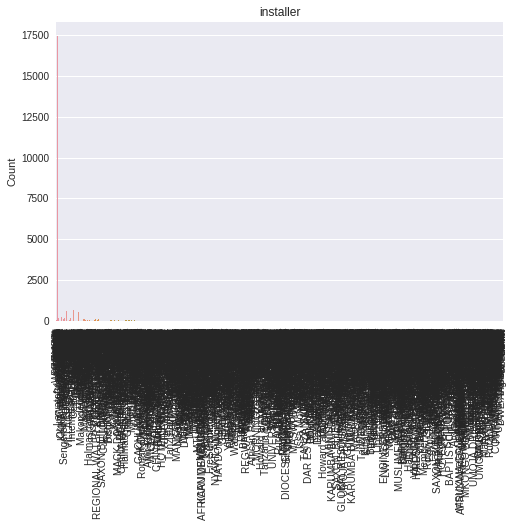

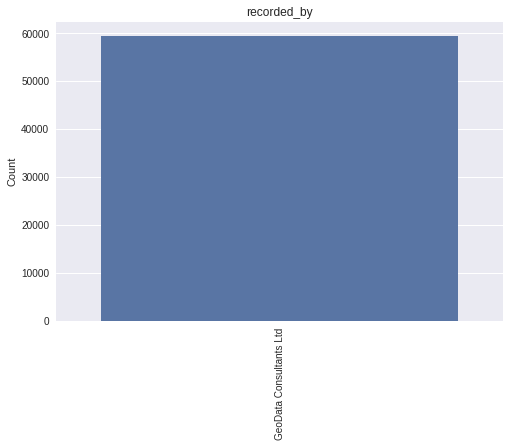

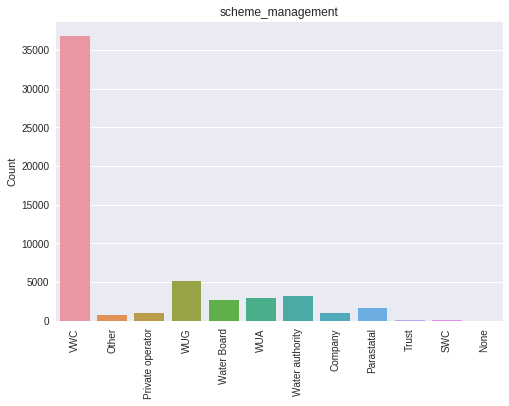

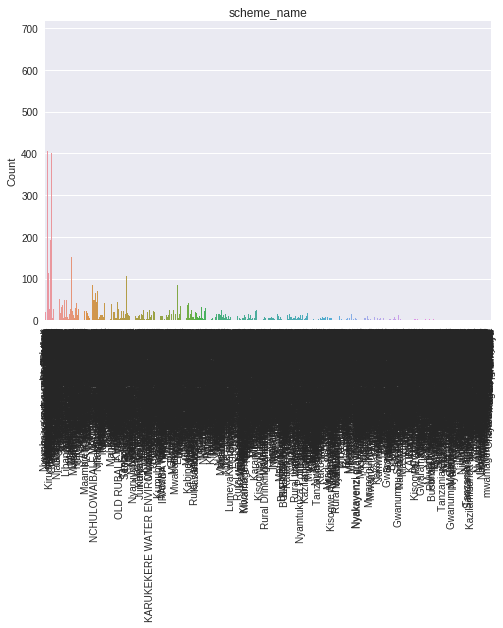

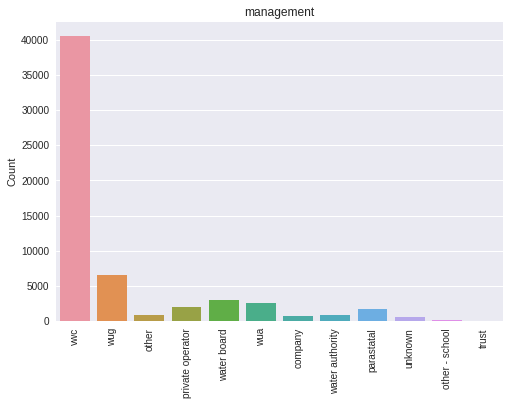

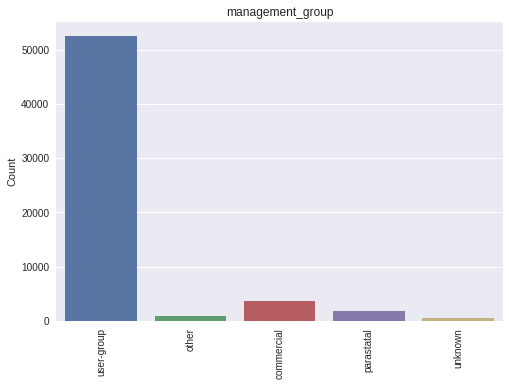

In [0]:
plot_features_of(trainX, management)

Similar to the analyses performed so far, only variables **'scheme_management'**, **'management'** and **'management_group'** seems to be useful. However, I'm not using them as of now.

## Miscellaneous features

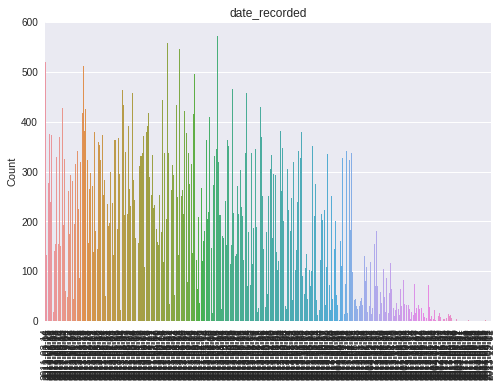

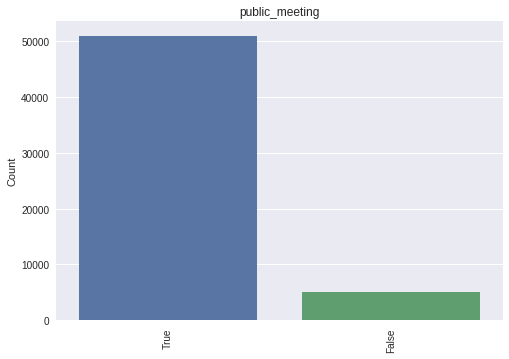

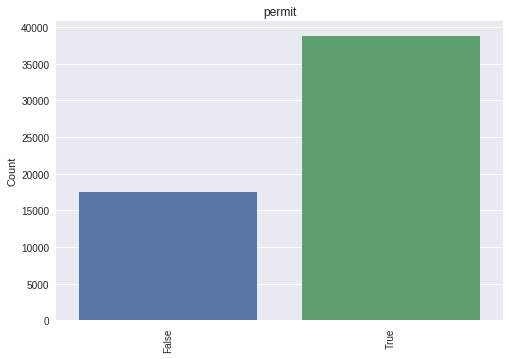

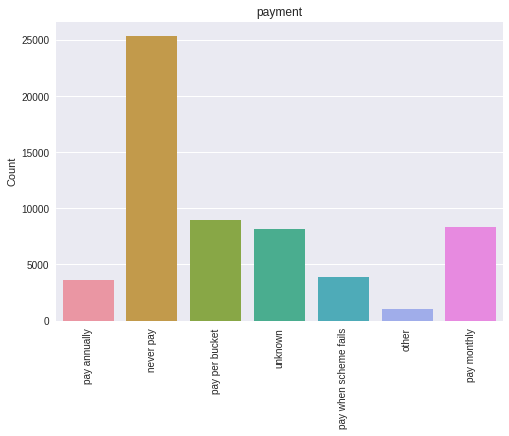

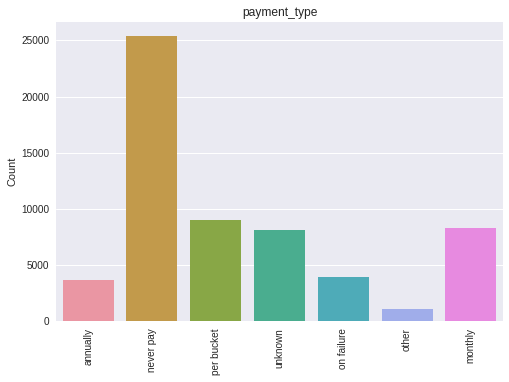

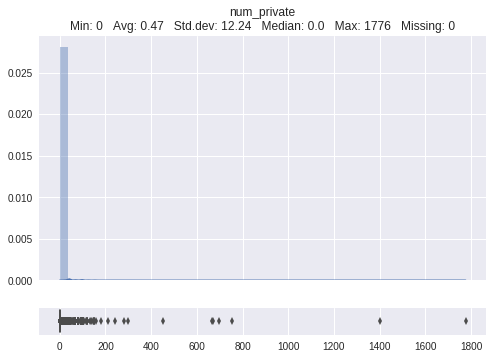

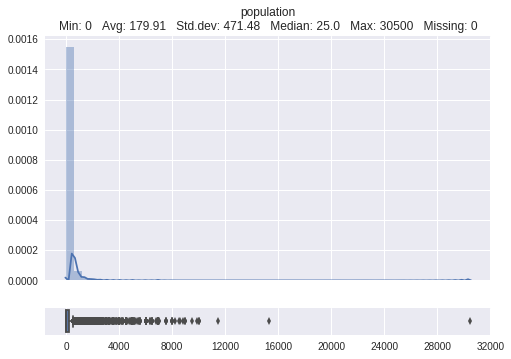

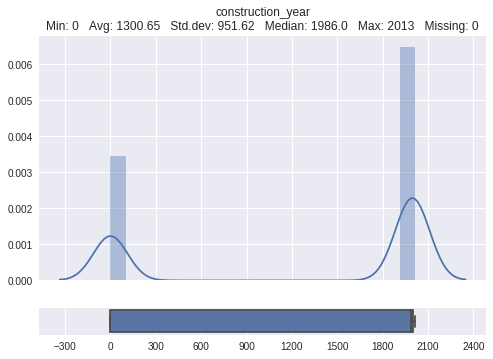

In [0]:
plot_features_of(trainX, misc)

Split **'date_recorded'** as year, month and day. This is one way of converting data-formatted-variable into int and object type variables. 

Keep only **'payment_type'**. Also, can keep **'public_meeting'** and **'permit'** variables as such.

Almost all values taken by variable **num_private** is zero. So, I'm removing it.

Need to replace zero values taken by variable **'population'** with mean of that region/basin. Similarly, need to replace variable **construction_year** also.


/usr/local/lib/python3.6/dist-packages/pandas/core/internals.py:3462: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


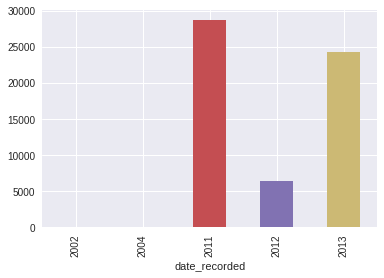

In [0]:
# code to just view how data_recorded is distributed w.r.t year, month and day.
trainX1['date_recorded'] = trainX1['date_recorded'].astype('datetime64')
#trainX1.groupby([trainX1['date_recorded'].dt.year, trainX1['date_recorded'].dt.month])['date_recorded'].count().plot(kind="bar")
trainX1.groupby([trainX1['date_recorded'].dt.year])['date_recorded'].count().plot(kind="bar")

In [31]:
# splitting date_recorded variable
trainX1['date_recorded'] = trainX1['date_recorded'].astype('datetime64')
trainX1['year_recorded'] = trainX1['date_recorded'].apply(lambda x: x.year)
trainX1['month_recorded'] = trainX1['date_recorded'].apply(lambda x: x.month)
trainX1['day_recorded'] = trainX1['date_recorded'].apply(lambda x: x.day)

trainX1.year_recorded = trainX1.year_recorded.astype(object)
trainX1.month_recorded = trainX1.month_recorded.astype(object)
trainX1.day_recorded = trainX1.day_recorded.astype(int)

/usr/local/lib/python3.6/dist-packages/pandas/core/internals.py:3462: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


In [32]:
# doing same for test
testX1['date_recorded'] = testX1['date_recorded'].astype('datetime64')
testX1['year_recorded'] = testX1['date_recorded'].apply(lambda x: x.year)
testX1['month_recorded'] = testX1['date_recorded'].apply(lambda x: x.month)
testX1['day_recorded'] = testX1['date_recorded'].apply(lambda x: x.day)

testX1.year_recorded = testX1.year_recorded.astype(object)
testX1.month_recorded = testX1.month_recorded.astype(object)
testX1.day_recorded = testX1.day_recorded.astype(int)

/usr/local/lib/python3.6/dist-packages/pandas/core/internals.py:3462: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


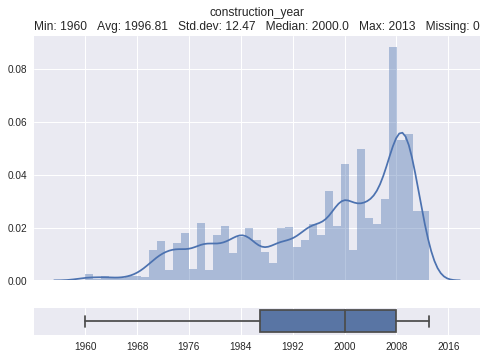

In [0]:
# plotting construction_year variable disregaring null values.

trainX1['construction_year'] = trainX1['construction_year'].astype('int')
#trainX1.groupby([trainX1['construction_year'].dt.year])['construction_year'].count().plot(kind="bar")

numeric_plot(trainX1[trainX1.construction_year != 0], ['construction_year'])

In [0]:
trainX1['construction_year'].isnull().sum()

6873

To replace zero values for the variable **construction_year**, I felt variables **installer** or **funder** seem to be best candidate for the process. That is, replacing a zero valued **construction_year** of a waterpoint with the median of all **construction_year** of its **installer** or **funder** would be more appropriate than using some location variable for the same. However, there were still zero values since **installer** and **funder** themselves had zeros. So, first, I replaced the remaining zeros with the median of all **construction_year**.

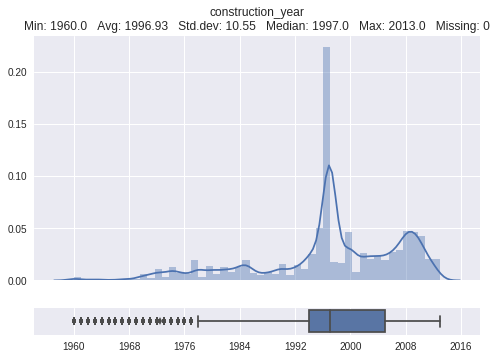

In [0]:
# First trying with 'installer' variable 

#trainX1.groupby('installer')['construction_year'].agg({np.median, np.min, np.max}).reset_index()

trainX1['construction_year'].replace(0, np.NaN, inplace = True)

# replacing 0 construction year by the median year that particular installer have installed the well
trainX1['construction_year'] = trainX1['construction_year'].fillna(trainX1.groupby('installer')['construction_year'].transform('median'))

# still there are missing values - replace them with overall median
trainX1['construction_year'] = trainX1['construction_year'].fillna(trainX1['construction_year'].median())

numeric_plot(trainX1, ['construction_year'])

In [0]:
trainX.groupby('funder')['construction_year'].agg({np.median, np.min, np.max}).reset_index()

,funder,median,amax,amin
0,0,2000.0,2010,0
1,A/co Germany,2009.0,2009,2009
2,Aar,0.0,0,0
3,Abas Ka,0.0,0,0
4,Abasia,1985.0,2011,1985
5,Abc-ihushi Development Cent,0.0,0,0
6,Abd,0.0,0,0
7,Abdala,0.0,0,0
8,Abddwe,0.0,0,0
9,Abdul,2011.0,2011,2011


In [0]:
trainX1.update(trainX.construction_year)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


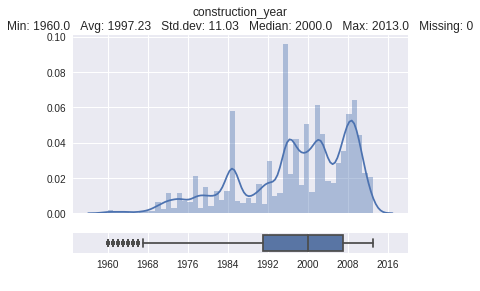

In [34]:

# Trying with 'funder' now. The graphs looks more distributed than 'installer'.

trainX1['construction_year'].replace(0, np.NaN, inplace = True)

# replacing 0 construction year by the median year that particular funder have installed the well
trainX1['construction_year'] = trainX1['construction_year'].fillna(trainX1.groupby('funder')['construction_year'].transform('median'))

# still there are missing values - So, now tried replacing them based on basins instead of overall median. 
# The plot looks better with this choice. 
trainX1['construction_year'] = trainX1['construction_year'].fillna(trainX1.groupby('basin')['construction_year'].transform('median'))

numeric_plot(trainX1, ['construction_year'])

In [0]:
# Hence, doing same for test set

testX1['construction_year'].replace(0, np.NaN, inplace = True)

# replacing 0 construction year by the median year that particular funder have installed the well
testX1['construction_year'] = testX1['construction_year'].fillna(trainX1.groupby('funder')['construction_year'].transform('median'))

# still there are missing values - replace them with bains
testX1['construction_year'] = testX1['construction_year'].fillna(trainX1.groupby('basin')['construction_year'].transform('median'))

#numeric_plot(trainX1, ['construction_year'])

In [0]:
# Next, replacing zeros in population based on basin.
trainX1['population'].replace(0, np.NaN, inplace = True)

trainX1['population'] = trainX1['population'].fillna(trainX1.groupby('basin')['population'].transform('mean'))

In [0]:
# doing same for test set
testX1['population'].replace(0, np.NaN, inplace = True)

testX1['population'] = testX1['population'].fillna(trainX1.groupby('basin')['population'].transform('mean'))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


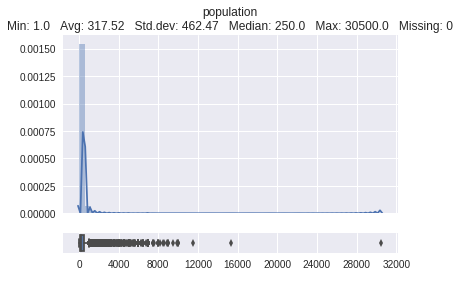

In [38]:
numeric_plot(trainX1, ['population'])

In [0]:
trainX1.groupby('region')['population'].agg({np.median, np.min, np.max}).reset_index()

,region,amin,median,amax
0,Arusha,1.000000,150.000000,9500.000000
1,Dar es Salaam,1.000000,150.000000,9865.000000
2,Dodoma,218.697150,278.753316,306.707562
3,Iringa,1.000000,78.500000,3072.000000
4,Kagera,472.900196,529.257504,529.257504
5,Kigoma,1.000000,370.000000,8500.000000
6,Kilimanjaro,1.000000,40.000000,8000.000000
7,Lindi,1.000000,300.000000,5050.000000
8,Manyara,1.000000,213.000000,15300.000000
9,Mara,1.000000,300.000000,10000.000000


So there was no big change in plot for **population**. But anyway I'm keeping it as such.

Finally, in the absence of any further information, NaN in **public_meeting** and **permit** are assumed false. Another way is to evenly distribute the NaN values into True and False. Anyway, as of now, I'm following the first method.

In [0]:
trainX1['public_meeting'].fillna(False, inplace = True)
trainX1['permit'].fillna(False, inplace = True)

trainX1.public_meeting = trainX1.public_meeting.astype(object)
trainX1.permit = trainX1.permit.astype(object)

trainX1.construction_year = trainX1.permit.astype(int)
trainX1.population = trainX1.population.astype(int)

In [0]:
# doing above 3 for test set
testX1['public_meeting'].fillna(False, inplace = True)
testX1['permit'].fillna(False, inplace = True)

testX1.public_meeting = testX1.public_meeting.astype(object)
testX1.permit = testX1.permit.astype(object)

testX1.construction_year = testX1.permit.astype(int)
testX1.population = testX1.population.astype(int)

In [0]:
misc = ['year_recorded', 'month_recorded', 'day_recorded', 'population', 'public_meeting',
        'permit', 'construction_year', 'payment_type']

In [0]:
trainX2 = trainX1.copy()
final_features = waterpoint_characs + waterpoint_locs + water_characs + misc
trainX2 = trainX2[final_features]

In [0]:
testX1 = testX1[final_features]

In [44]:
trainX2.head()

,gps_height,extraction_type_group,extraction_type_class,waterpoint_type,latitude,longitude,basin,region,quality_group,quantity_group,source_type,source_class,year_recorded,month_recorded,day_recorded,population,public_meeting,permit,construction_year,payment_type
0,1390,gravity,gravity,communal standpipe,-9.856322,34.938093,Lake Nyasa,Iringa,good,enough,spring,groundwater,2011,3,14,109,True,False,0,annually
1,1399,gravity,gravity,communal standpipe,-2.147466,34.698766,Lake Victoria,Mara,good,insufficient,rainwater harvesting,surface,2013,3,6,280,False,True,1,never pay
2,686,gravity,gravity,communal standpipe multiple,-3.821329,37.460664,Pangani,Manyara,good,enough,dam,surface,2013,2,25,250,True,True,1,per bucket
3,263,submersible,submersible,communal standpipe multiple,-11.155298,38.486161,Ruvuma / Southern Coast,Mtwara,good,dry,borehole,groundwater,2013,1,28,58,True,True,1,never pay
4,1329,gravity,gravity,communal standpipe,-1.825359,31.130847,Lake Victoria,Kagera,good,seasonal,rainwater harvesting,surface,2011,7,13,529,True,True,1,never pay


In [45]:
trainX2.describe(include='all')

,gps_height,extraction_type_group,extraction_type_class,waterpoint_type,latitude,longitude,basin,region,quality_group,quantity_group,source_type,source_class,year_recorded,month_recorded,day_recorded,population,public_meeting,permit,construction_year,payment_type
count,59400.000000,59400,59400,59400,5.940000e+04,59400.000000,59400,59400,59400,59400,59400,59400,59400.0,59400.0,59400.000000,59400.000000,59400,59400,59400.000000,59400
unique,NaN,13,7,7,NaN,NaN,9,21,6,5,7,3,5.0,12.0,NaN,NaN,2,2,NaN,7
top,NaN,gravity,gravity,communal standpipe,NaN,NaN,Lake Victoria,Iringa,good,enough,spring,groundwater,2011.0,3.0,NaN,NaN,True,True,NaN,never pay
freq,NaN,26780,26780,28522,NaN,NaN,10248,5294,50818,33186,17021,45794,28674.0,17936.0,NaN,NaN,51011,38852,NaN,25348
mean,1108.206902,NaN,NaN,NaN,-5.706033e+00,35.074211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.621498,317.352273,NaN,NaN,0.654074,NaN
std,540.273131,NaN,NaN,NaN,2.946019e+00,2.603082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.687553,462.449864,NaN,NaN,0.475673,NaN
min,-90.000000,NaN,NaN,NaN,-1.164944e+01,29.607122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,0.000000,NaN
25%,777.000000,NaN,NaN,NaN,-8.540621e+00,33.090347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,100.000000,NaN,NaN,0.000000,NaN
50%,1315.000000,NaN,NaN,NaN,-5.021597e+00,34.908743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,250.000000,NaN,NaN,1.000000,NaN
75%,1474.000000,NaN,NaN,NaN,-3.326156e+00,37.178387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,472.000000,NaN,NaN,1.000000,NaN


In [46]:
trainX2.shape

(59400, 20)

In [47]:
testX1.head()

,gps_height,extraction_type_group,extraction_type_class,waterpoint_type,latitude,longitude,basin,region,quality_group,quantity_group,source_type,source_class,year_recorded,month_recorded,day_recorded,population,public_meeting,permit,construction_year,payment_type
0,1996.0,other,other,other,-4.059696,35.290799,Internal,Manyara,good,seasonal,rainwater harvesting,surface,2013,2,4,321,True,True,1,never pay
1,1569.0,gravity,gravity,communal standpipe,-3.309214,36.656709,Pangani,Arusha,good,insufficient,spring,groundwater,2013,2,4,300,True,True,1,never pay
2,1567.0,other,other,other,-5.004344,34.767863,Internal,Singida,good,insufficient,rainwater harvesting,surface,2013,2,1,500,True,False,0,never pay
3,267.0,other,other,other,-9.418672,38.058046,Ruvuma / Southern Coast,Lindi,good,dry,shallow well,groundwater,2013,1,22,250,False,True,1,unknown
4,1260.0,gravity,gravity,communal standpipe,-10.950412,35.006123,Ruvuma / Southern Coast,Ruvuma,good,enough,spring,groundwater,2013,3,27,60,False,True,1,monthly


In [48]:
final_features

['gps_height',
 'extraction_type_group',
 'extraction_type_class',
 'waterpoint_type',
 'latitude',
 'longitude',
 'basin',
 'region',
 'quality_group',
 'quantity_group',
 'source_type',
 'source_class',
 'year_recorded',
 'month_recorded',
 'day_recorded',
 'population',
 'public_meeting',
 'permit',
 'construction_year',
 'payment_type']

## Dummy variable creation and label encoding outcome variable

In [0]:
trainX2 = pd.get_dummies(trainX2, sparse=True, drop_first=True)

In [0]:
# doing same for test set
testX1 = pd.get_dummies(testX1, sparse=True, drop_first=True)

In [0]:
from sklearn import preprocessing

In [0]:
trainY1 = trainY[['status_group']]

In [0]:
le = preprocessing.LabelEncoder()

In [54]:
trainY1['status_group'] = le.fit_transform(trainY['status_group'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
le.classes_

array(['functional', 'functional needs repair', 'non functional'],
      dtype=object)

In [0]:
# This variable is used in displaying the model's performance in confusion matrix format
label_for_display = le.classes_

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


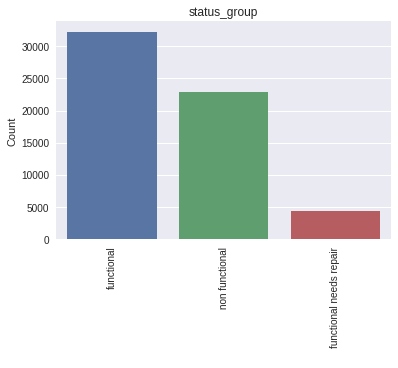

In [0]:
# output labels:
discrete_plot(trainY,['status_group'])

# Modeling

In [57]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
#from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold as sf
from sklearn import metrics 
import pickle
from google.colab import files
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## XGBoost

In [0]:
xgb1_params = {'learning_rate': 0.1, 'n_estimators': 1000,
               'max_depth':10, 'min_child_weight': 2,'gamma': 0, 
               'subsample': 0.4, 'colsample_bytree': 0.4, 
               'scale_pos_weight': 2, 'max_delta_step':1,
               'objective': 'multi:softmax','seed': 8}

xgb1 = XGBClassifier(**xgb1_params)
xgb1.fit(trainX2, trainY1['status_group'], eval_metric='merror')

In [0]:
train_predictions = xgb1.predict(trainX2)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Model Report-train
Confusion matrix, without normalization
Accuracy : 0.9601


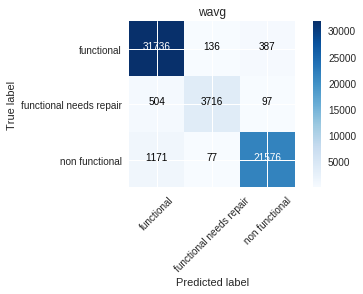

In [0]:
result()

## Random forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini',
                                min_samples_split=6,
                                n_estimators=1000,
                                max_features='auto',
                                oob_score=True,
                                random_state=1,
                                n_jobs=-1)
                            
rf.fit(trainX2, trainY1['status_group'])
print("%.4f" % rf.oob_score_)

0.8068


Model Report-train
Confusion matrix, without normalization
Accuracy : 0.9349


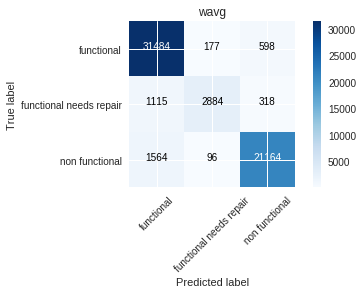

In [0]:
train_predictions = rf.predict(trainX2)
print("Model Report-train")
get_confusion_matrix(trainY1, train_predictions)
  
print("Accuracy : %.4g" % metrics.accuracy_score(trainY1['status_group'].values, train_predictions))

I have tried xgboost and random forest. I tried chosing parameters for xgboost by cross validation, but it took much longer time with my computer. So tried paramters by intuition. 

To do:
1. Anyway, I still have to cross validate at least few parameters. 
2. have to try ensembles of xgboost with different seeds.

However, simple intutions worked somewhat okay scoring 0.8126 for the test set.

## Printing importance of variables

In [0]:
#feat_imp = pd.Series(xgb1.booster().get_fscore()).sort_values(ascending=False)
#feat_imp.plot(kind='bar', title='Feature Importances')

pd.concat((pd.DataFrame(trainX2.columns, columns = ['variables']), 
           pd.DataFrame(xgb1.feature_importances_, columns = ['importance'])),axis = 1).sort_values(by='importance', ascending = False)[:10]

,variable,importance
2,longitude,0.196052
1,latitude,0.190983
0,gps_height,0.132843
4,population,0.090915
3,day_recorded,0.084262
47,quantity_group_enough,0.012827
77,payment_type_never pay,0.012617
5,construction_year,0.012203
12,waterpoint_type_communal standpipe,0.011736
48,quantity_group_insufficient,0.011615


# Test set predictions and submission file

In [0]:
test_predictions = xgb1.predict(testX1)
test_sub_arr = le.inverse_transform(test_predictions)
test_predictions_df = pd.DataFrame(test_sub_arr)
test_predictions_df.columns = ['status_group']
submission = pd.concat([testX['id'],test_predictions_df['status_group']], axis=1, ignore_index=True)
submission.columns = ['id', 'status_group']
submission.head(5)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,id,status_group
0,50785,non functional
1,51630,functional needs repair
2,17168,functional
3,45559,non functional
4,49871,functional


In [0]:
submission.to_csv('submission8.csv')
from google.colab import files
files.download('submission8.csv')

# Helper functions

Plotting function:

In [0]:
# discrete variables plot - change this to class structure
from matplotlib.ticker import MaxNLocator

def plot_features_of(data, features):
    data = data[features]
    data_types = data.dtypes
    
    categorical_attrs = list(data_types[data_types == 'object'].index)
    if len(categorical_attrs) > 0:
        discrete_plot(data, categorical_attrs)
    
    numeric_attrs = list(data_types[(data_types == 'int64') | (data_types=='float64')].index)
    if len(categorical_attrs) > 0:
        numeric_plot(data, numeric_attrs)
    
def discrete_plot(data, categorical_attrs):
    for attr_name in categorical_attrs:
        a = plt.figure()

        attr_data = data[attr_name]

        # Rotate the label of the vertical axis
        # so that it's easy to read

        plot = sns.countplot(x=attr_name, data=data)

        plot.set_title(attr_name)
        plot.set_xlabel(' ')
        plot.set_ylabel('Count')
        plot.yaxis.label.set_rotation(90)
        #plot.set_xticklabels(rotation=90)
        loc, labels = plt.xticks()
        plot.set_xticklabels(labels, rotation=90)

    plt.draw()
    
def numeric_plot(data, numeric_attrs):
    for attr_name in numeric_attrs:
        # Create a figure with two subfigures that share an X axis
        f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, 
                                               gridspec_kw={"height_ratios": (.9, .1)})

        attr_data = data[attr_name]
        # Compute basic attribute summaries
        mini = attr_data.min()
        mean = attr_data.mean()
        median = attr_data.median()
        maxi = attr_data.max()
        std_dev = attr_data.std()
        missing_count = np.count_nonzero(attr_data.isnull().values)

        # `dropna()` removes missing values from consideration
        distplot = sns.distplot(data[attr_name].dropna(), kde=True, rug=False, axlabel=False, ax=ax_hist)

        # - Put the attribute name and stats in the title
        # - Keep only integer tics
        distplot.set_title(attr_name + '\n' + 
                       'Min: '         + str(round(mini,2))     + '   ' +
                       'Avg: '         + str(round(mean, 2))    + '   ' +
                       'Std.dev: '     + str(round(std_dev, 2)) + '   ' +
                       'Median: '      + str(round(median,2))   + '   ' +
                       'Max: '         + str(round(maxi,2))     + '   ' +
                       'Missing: '     + str(missing_count))

        distplot.xaxis.set_major_locator(MaxNLocator(integer=True))

        boxplot = sns.boxplot(attr_data, ax=ax_box)
        boxplot.set_xlabel(' ')

In [0]:
from sklearn.metrics import confusion_matrix

In [60]:

def get_confusion_matrix(y_true, y_pred):

    mat = confusion_matrix(y_true, y_pred)
    
    plt.figure()
    plot_confusion_matrix(mat, classes=label_for_display,title='wavg')

    
    
#from sklearn.metrics import classification_report
#from sklearn.metrics import f1_score

'''
def performance_report(y_true, y_pred, y_prob, cv_true=False):
    
    print(classification_report(y_true, y_pred, target_names=label_for_display))

    print("f1-score (micro macro weighted)")
    print(f1_score(y_true, y_pred, average='micro'), 
          f1_score(y_true, y_pred, average='macro'),
          f1_score(y_true, y_pred, average='weighted'))
    
    print("roc_auc - %.3g" %roc_auc_score(y_true, y_prob) )
'''

'\ndef performance_report(y_true, y_pred, y_prob, cv_true=False):\n    \n    print(classification_report(y_true, y_pred, target_names=label_for_display))\n\n    print("f1-score (micro macro weighted)")\n    print(f1_score(y_true, y_pred, average=\'micro\'), \n          f1_score(y_true, y_pred, average=\'macro\'),\n          f1_score(y_true, y_pred, average=\'weighted\'))\n    \n    print("roc_auc - %.3g" %roc_auc_score(y_true, y_prob) )\n'

In [0]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
# function for plotting confusion matri and display accuracy
def result():
  #Print model report:
  print("Model Report-train")
  get_confusion_matrix(trainY1, train_predictions)
  
  print("Accuracy : %.4g" % metrics.accuracy_score(trainY1['status_group'].values, train_predictions))